## Homework 1:

1- Build a Keras Model for linear regression (check: https://keras.io/activations/ ). Use Boston Housing Dataset to train and test your model

2- Build a Keras Model for logistic regression. Use diabetes.csv to train and test

Comments:

1- Build the **simplest model** for linear regression with Keras and compare your model performance with `from sklearn.linear_model import LinearRegression`

2- Build the **simplest model** for logistic regression with Keras and compare your model performance with `from sklearn.linear_model import LogisticRegression`

3- **Add more complexity to your models in (1) and (2)** and compare with previous results

## Imports

In [29]:
# gets rid of warning to make the notebook cleaner
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [4]:
from tensorflow.nn import softmax, sigmoid

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

### Pt 1: Keras Sequential Model with Boston Housing Dataset

## Load Boston

In [6]:
from sklearn.datasets import load_boston

In [7]:
boston = load_boston()
bos_df = pd.DataFrame(boston.data, columns=boston.feature_names)
bos_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Split up the Boston data

In [8]:
x = boston.data
y = boston.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 5)

## Scale the data

In [9]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Create a Sequential Kerras model 

In [10]:
model = Sequential()

model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

### Train model on training data using model.fit for 12 epochs

In [11]:
# Train the model
history = model.fit(
    x_train_scaled,
    y_train,
    epochs=12,
    shuffle=True,
    verbose=2
)

Epoch 1/12
 - 0s - loss: 564.5630
Epoch 2/12
 - 0s - loss: 491.9431
Epoch 3/12
 - 0s - loss: 372.8684
Epoch 4/12
 - 0s - loss: 202.1956
Epoch 5/12
 - 0s - loss: 76.9133
Epoch 6/12
 - 0s - loss: 60.5734
Epoch 7/12
 - 0s - loss: 39.7908
Epoch 8/12
 - 0s - loss: 32.1809
Epoch 9/12
 - 0s - loss: 27.0840
Epoch 10/12
 - 0s - loss: 24.7710
Epoch 11/12
 - 0s - loss: 22.4711
Epoch 12/12
 - 0s - loss: 21.0110


### Determine loss function, optimizer and metrics for the model

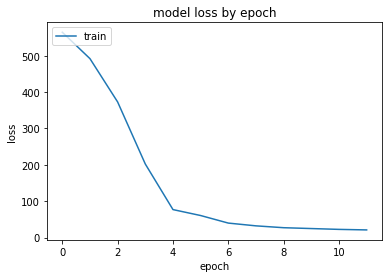

In [12]:
plt.plot(history.history['loss'])
plt.title('model loss by epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [13]:
y_pred = model.predict(x_test_scaled)
mean_squared_error(y_test, y_pred)

28.42249706723854

## Create a linear regression model

In [14]:
linreg = LinearRegression()
linreg.fit(x_train_scaled, y_train)
y_pred = linreg.predict(x_test_scaled)
mean_squared_error(y_test, y_pred)

28.53045876597462

#### Compare results of Sequential model to linear regression model:
- The sequential model works better when it has more than 12 epochs
- The mean squared error of both models are pretty similar

## Pt 2: Keras Sequential Model with Diabetes Dataset

In [15]:
diabetes_df = pd.read_csv('datasets/diabetes.csv')

In [26]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
x = diabetes_df.drop(['Outcome'], axis=1)
y = diabetes_df['Outcome']
x_scale = StandardScaler(x)

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 5)

## Create a Sequential Kerras model 

In [18]:
model = Sequential([
                Dense(8, activation=sigmoid),
#                 Dense(16, activation=softmax),
#                 Dense(2, activation=softmax)
])

model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics =['accuracy'])

### Train model on training data using model.fit for 12 epochs

In [19]:
# Train the model
history = model.fit(np.array(x_train), np.array(y_train), epochs=75)

Epoch 1/75
576/576 [==============================] - 0s 171us/step - loss: 2.0257 - acc: 0.2448
Epoch 2/75
576/576 [==============================] - 0s 14us/step - loss: 2.0061 - acc: 0.2743
Epoch 3/75
576/576 [==============================] - 0s 17us/step - loss: 1.9876 - acc: 0.2986
Epoch 4/75
576/576 [==============================] - 0s 16us/step - loss: 1.9700 - acc: 0.3125
Epoch 5/75
576/576 [==============================] - 0s 18us/step - loss: 1.9533 - acc: 0.3385
Epoch 6/75
576/576 [==============================] - 0s 18us/step - loss: 1.9374 - acc: 0.3611
Epoch 7/75
576/576 [==============================] - 0s 18us/step - loss: 1.9222 - acc: 0.3854
Epoch 8/75
576/576 [==============================] - 0s 18us/step - loss: 1.9076 - acc: 0.3941
Epoch 9/75
576/576 [==============================] - 0s 18us/step - loss: 1.8937 - acc: 0.4167
Epoch 10/75
576/576 [==============================] - 0s 19us/step - loss: 1.8803 - acc: 0.4253
Epoch 11/75
576/576 [=================

### Determine loss function, optimizer and metrics for the model

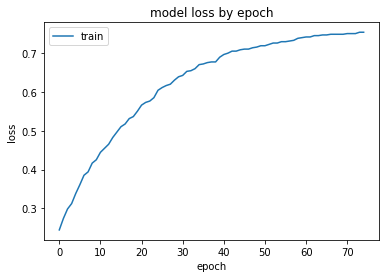

In [20]:
plt.plot(history.history['acc'])
plt.title('model loss by epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

## Logistic Regression

In [31]:
standard_scaler = StandardScaler()
x_scaled = standard_scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 5)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
accuracy_score(y_test, y_pred)

0.7760416666666666

### Compare the sequential nn model to logistic regression model
- again they are very similar
- NN model had 73% accuracy score
- ML model had a 77% accuracy score
- the accuracy of the ml is better than that of the nn model
- the accuracy can be better with more epochs but I thought 75 was enough